In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# url from TomTom website which shows real time traffic
url = "https://api.midway.tomtom.com/ranking/liveHourly/IND_bangalore"

In [3]:
# this loads the data from the url
b_req = requests.get(url)

In [4]:
# unpacks the contents of json file
b_json = b_req.json()

In [5]:
traffic = list()
time = list()

In [6]:
# creating lists of data for relevant fields
for i in range(len(b_json['data'])): 
    traffic.append(b_json['data'][i]['TrafficIndexLive'])
    time.append(b_json['data'][i]['UpdateTime'])

In [7]:
# converting it into a dataframe for tabular format
b_df = pd.DataFrame({"Live Traffic":traffic}, index = time)
b_df.index.name = "Time"

In [11]:
# convert string date format to datetime
b_df.index = pd.to_datetime(b_df.index)

In [12]:
b_df.head()

,Live Traffic
Time,
1970-01-01 00:26:27.717090001,8
1970-01-01 00:26:27.720690000,6
1970-01-01 00:26:27.726090000,7
1970-01-01 00:26:27.730590000,11
1970-01-01 00:26:27.734190000,16


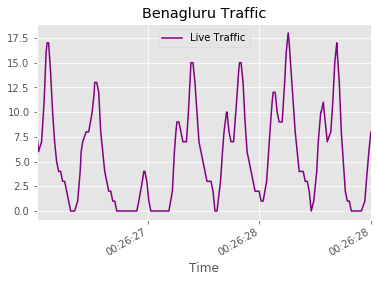

In [13]:
# visualising using ggplots
plt.style.use("ggplot")
axes = b_df.plot(color="purple")
plt.title("Benagluru Traffic")
plt.show()